<a href="https://colab.research.google.com/github/leekh8/Colaboratory/blob/main/ex08_MLP_%ED%99%9C%EC%84%B1%ED%99%94%2C%EC%B5%9C%EC%A0%81%ED%99%94%ED%95%A8%EC%88%98%EB%B9%84%EA%B5%90_%ED%8C%A8%EC%85%98%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Colab Notebooks/Colaboratory/AISchool/'

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Colaboratory/AISchool


# 목표
- 이미지 다루는 실습 진행하기
- 패션 소품에 대한 클래스 값을 가진 데이터를 활용해 다중 분류 신경망 생성
- 활성화, 최적화 함수의 조합을 accuracy를 통해 비교

In [2]:
# 환경 세팅
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential # 신경망 뼈대 구축
from tensorflow.keras.layers import Dense # 층 내용 정의하는 도구
from tensorflow.keras.datasets import fashion_mnist # 텐서플로우 안에 있는 패션 데이터

In [3]:
# 데이터 불러오기
data = fashion_mnist.load_data()
data
# data = ((3차원 배열, 1차원 배열), (3차원 배열, 1차원 배열))
# data = ((훈련이미지 데이터, 훈련답), (테스트이미지 데이터, 테스트답))

# packing vs unpacking

4422102/4422102 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [6]:
# train, test = data
# train, test = fasion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data();
print("훈련 셋 크기: ", X_train.shape, y_train.shape)
print("테스트 셋 크기: ", X_test.shape, y_test.shape)

훈련 셋 크기:  (60000, 28, 28) (60000,)
테스트 셋 크기:  (10000, 28, 28) (10000,)


In [7]:
# 이미지 출력
# 2차원 배열 -> 이미지 1장
# 흑백 계열 이미지: 0 ~ 255 (0: 검은색, 255: 흰색)
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

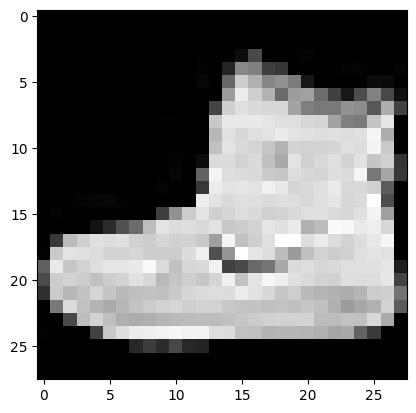

In [8]:
plt.imshow(X_train[0], cmap = "gray")
plt.show()

In [10]:
# 답데이터 출력
y_train[0]

9

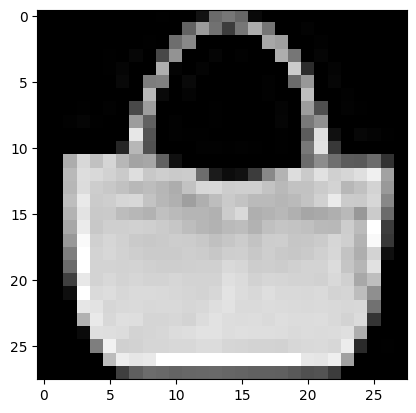

8


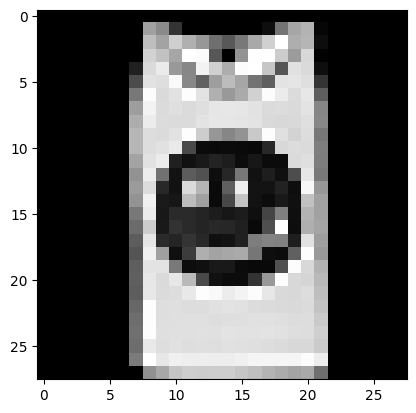

0


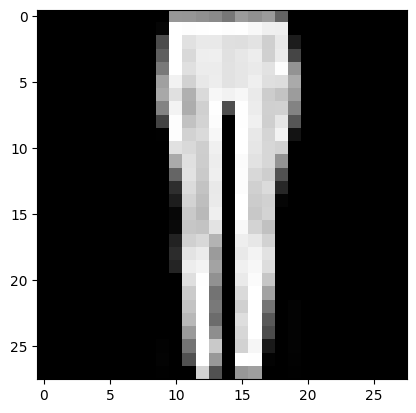

1


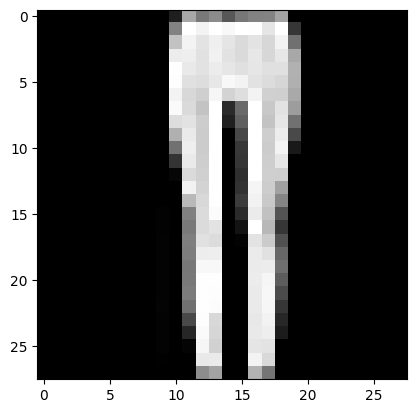

1


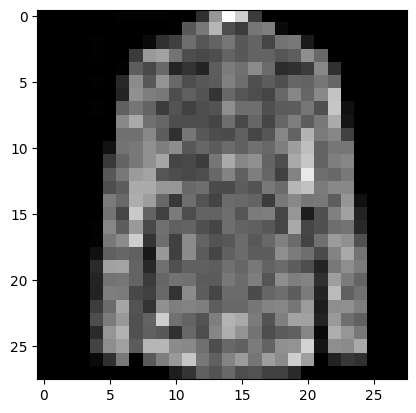

6


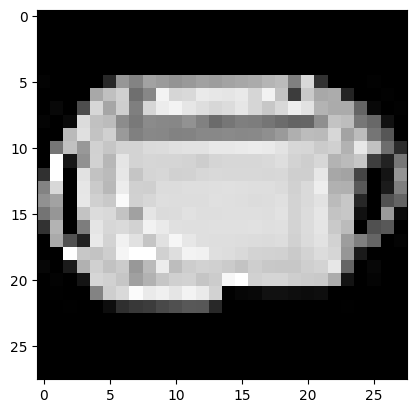

8


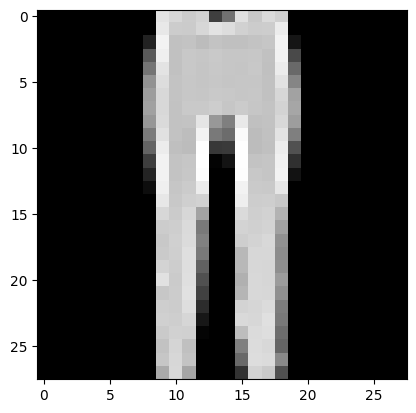

1


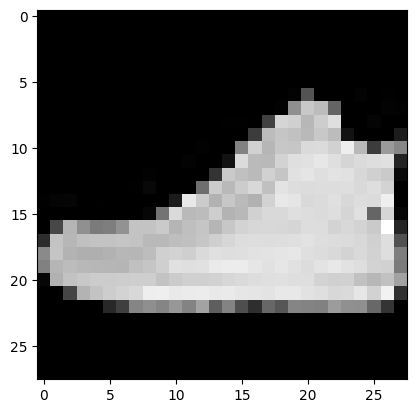

9


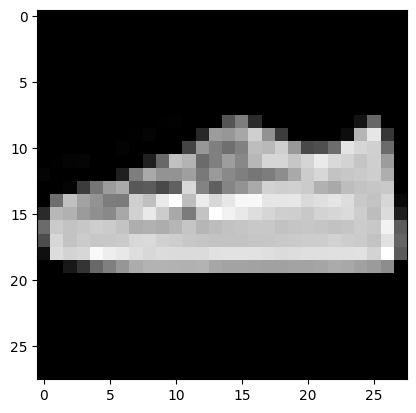

7


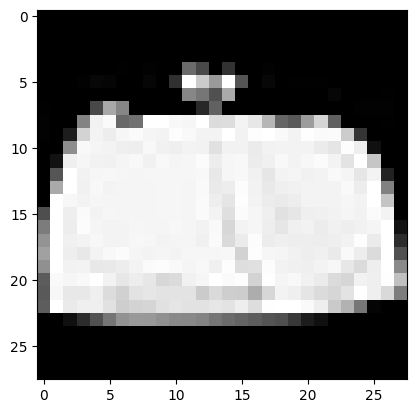

8


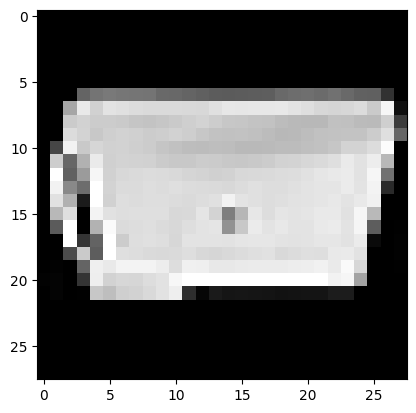

8


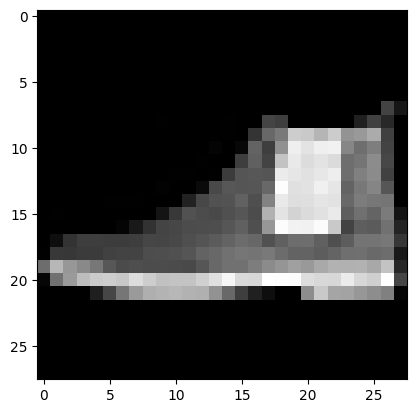

9


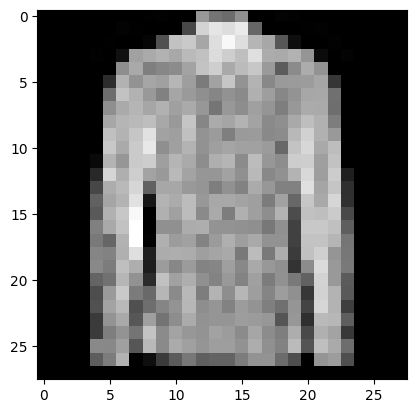

6


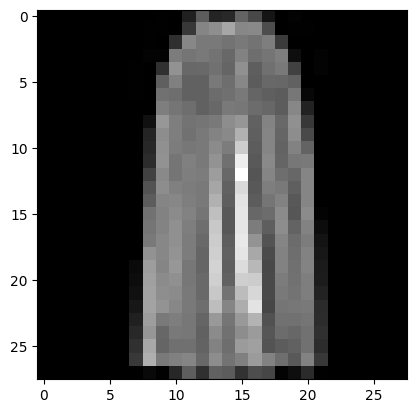

6


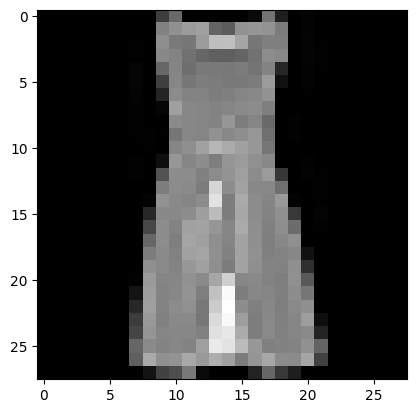

3


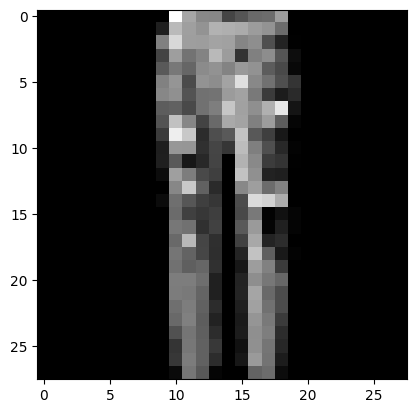

1


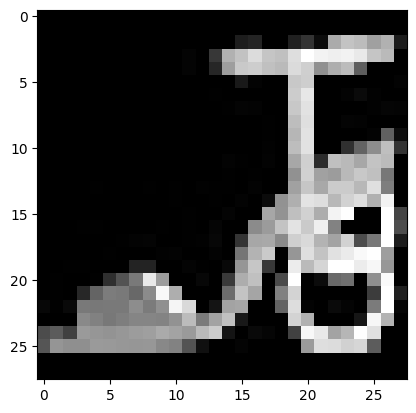

5


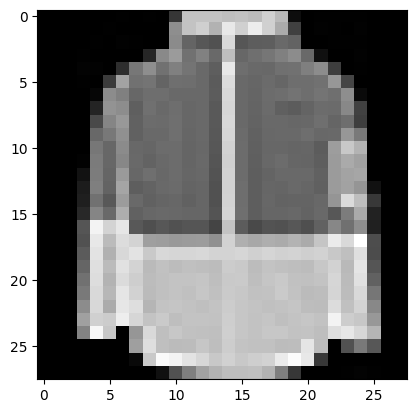

4


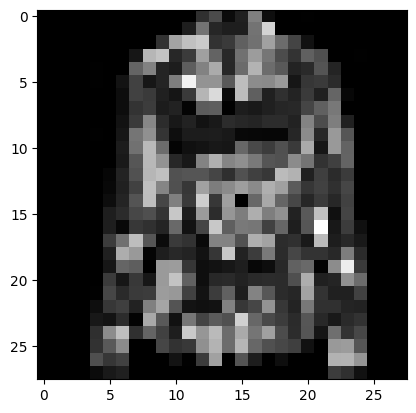

6


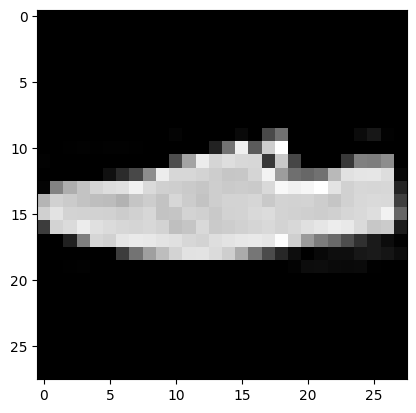

7


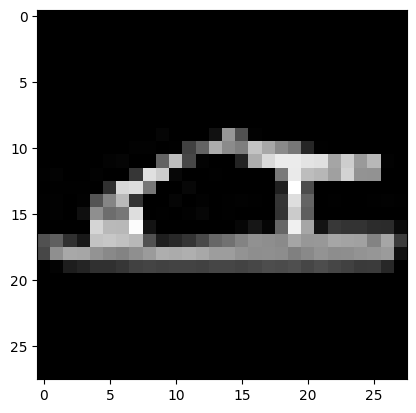

5


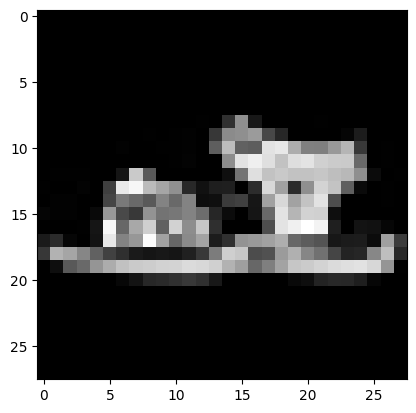

5


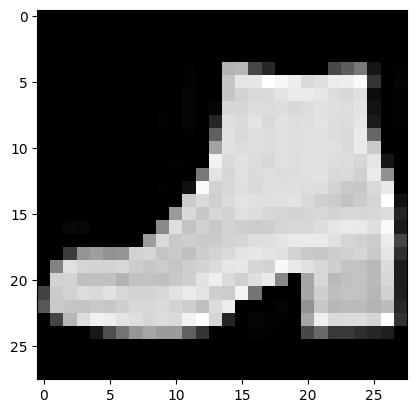

9


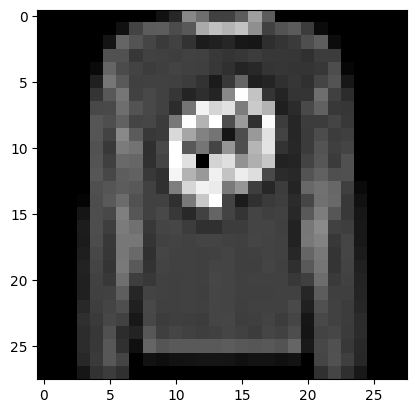

2


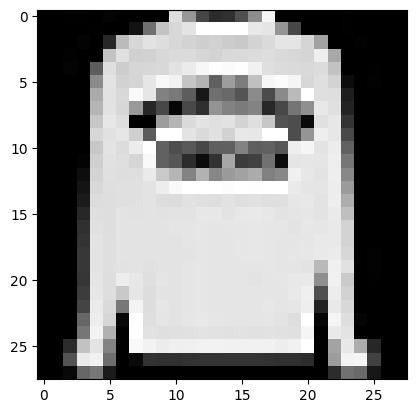

2


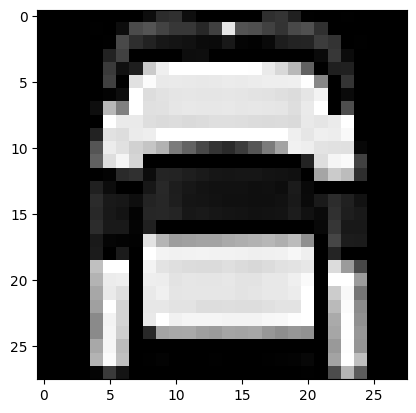

2


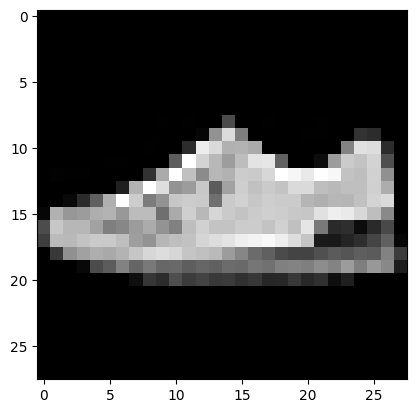

7


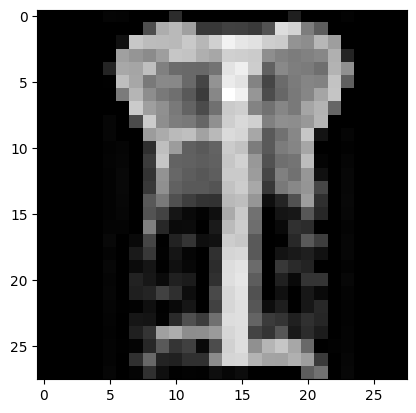

6


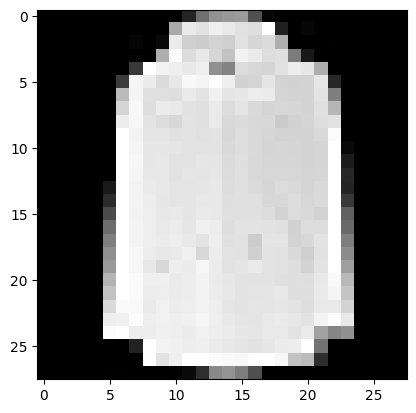

4


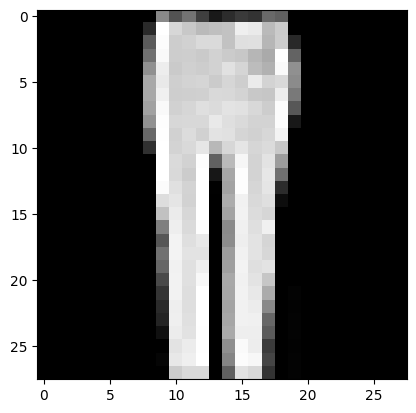

1


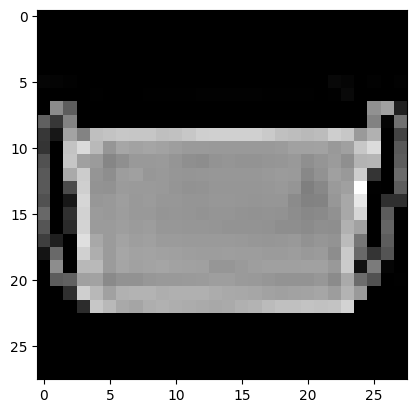

8


In [12]:
for i in range(100, 131):
  plt.imshow(X_train[i], cmap = "gray")
  plt.show()
  print(y_train[i])

In [13]:
# 다중 분류
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [17]:
np.unique(y_train).size
# 10개 클래스 -> 다중 분류 출력층 units = 클래스의 개수
np.unique(y_train, return_counts = True)
# 데이터의 다양성이 유지되고 있음

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [27]:
# 다중 분류 -> 답 데이터는 원핫인코딩

# pandas -> get_dummies()
# tensorflow.keras -> to_categorical()

#y_train_oh = pd.get_dummies(y_train) # df
#y_test_oh = pd.get_dummies(y_test)

from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

print("train 원 핫: ",y_train_oh.shape);
print("test 원 핫: ",y_test_oh.shape);

train 원 핫:  (60000, 10)
test 원 핫:  (10000, 10)


#### 활성화 함수, 최적화 함수 별 비교
- 1. 중간층 활성화: sigmoid, 최적화: sgd
- 2. 중간층 활성화: relu, 최적화: sgd
- 3. 중간층 활성화: relu, 최적화: adam

=> 각각의 신경망 설계 후 결과 비교

In [28]:
# 2차원 배열 (이미지 1장) -> MLP 모델
# MLP는 1차원 받아들임
# 2차원 배열 -> 1차원 배열 : Flatten()
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD, Adam

In [29]:
# 모델 생성
# 활성화 함수, 최적화 함수를 매개 변수로 연결하는 모델 생성 함수 정의
def create_model(acti, opti):
  # 뼈대 구축
  model = Sequential()

  # 층 쌓기 (입력층 1차원 변환, 중간층, 출력 다중 분류)
  model.add(Flatten(input_shape = (28, 28))) # 1차원 데이터 연결
  model.add(Dense(units = 256, activation = acti))
  model.add(Dense(units = 128, activation = acti))
  model.add(Dense(units = 64, activation = acti))
  model.add(Dense(units = 10, activation = 'softmax'))

  # 컴파일 loss, 최적화 함수, 정확도 지표
  model.compile(loss = "categorical_crossentropy", optimizer = opti, metrics = ["accuracy"])

  # 리턴 모델
  return model

In [30]:
# fit 함수 정의
# 모델명만 넣어주면 fit 진행하는 코드 작성
# 교차 검증 데이터 연결 - 30% 교차검증 데이터 활용
# 문제, 답, 반복 횟수 30, batch_size = 64
def fit_model(estimator):
  h = estimator.fit(X_train, y_train_oh, epochs = 30,
                batch_size = 64, validation_split = 0.3)
  return h

In [33]:
# 1. sig + sgd
model1 = create_model(acti = 'sigmoid', opti = SGD(learning_rate = 0.01))
h1 = fit_model(model1)

Epoch 1/30
657/657 [==============================] - 11s 7ms/step - loss: 2.2095 - accuracy: 0.3646 - val_loss: 2.0833 - val_accuracy: 0.5412
Epoch 2/30
657/657 [==============================] - 3s 4ms/step - loss: 1.9031 - accuracy: 0.5410 - val_loss: 1.7027 - val_accuracy: 0.6169
Epoch 3/30
657/657 [==============================] - 3s 4ms/step - loss: 1.5301 - accuracy: 0.6174 - val_loss: 1.3785 - val_accuracy: 0.6402
Epoch 4/30
657/657 [==============================] - 3s 4ms/step - loss: 1.2726 - accuracy: 0.6498 - val_loss: 1.1738 - val_accuracy: 0.6478
Epoch 5/30
657/657 [==============================] - 4s 5ms/step - loss: 1.0987 - accuracy: 0.6603 - val_loss: 1.0264 - val_accuracy: 0.6865
Epoch 6/30
657/657 [==============================] - 3s 5ms/step - loss: 0.9686 - accuracy: 0.6800 - val_loss: 0.9185 - val_accuracy: 0.6950
Epoch 7/30
657/657 [==============================] - 3s 4ms/step - loss: 0.8730 - accuracy: 0.7004 - val_loss: 0.8351 - val_accuracy: 0.7297
Epoch

In [35]:
# 2. relu + sgd
model2 = create_model(acti = 'relu', opti = SGD(learning_rate = 0.01))
h2 = fit_model(model2)

Epoch 1/30
657/657 [==============================] - 4s 5ms/step - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1008
Epoch 2/30
657/657 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1008
Epoch 3/30
657/657 [==============================] - 4s 5ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1008
Epoch 4/30
657/657 [==============================] - 3s 5ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1008
Epoch 5/30
657/657 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1008
Epoch 6/30
657/657 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1008
Epoch 7/30
657/657 [==============================] - 3s 5ms/step - loss: nan - accuracy: 0.0996 - val_loss: nan - val_accuracy: 0.1008
Epoch 8/30
657/657 [============================

In [37]:
# 3. relu + adam
model3 = create_model(acti = 'relu', opti = Adam(learning_rate = 0.001))
h3 = fit_model(model3)

Epoch 1/30
657/657 [==============================] - 5s 5ms/step - loss: 2.4480 - accuracy: 0.7501 - val_loss: 0.6986 - val_accuracy: 0.7887
Epoch 2/30
657/657 [==============================] - 3s 4ms/step - loss: 0.5418 - accuracy: 0.8247 - val_loss: 0.5463 - val_accuracy: 0.8203
Epoch 3/30
657/657 [==============================] - 4s 6ms/step - loss: 0.4431 - accuracy: 0.8467 - val_loss: 0.4892 - val_accuracy: 0.8401
Epoch 4/30
657/657 [==============================] - 3s 5ms/step - loss: 0.4052 - accuracy: 0.8549 - val_loss: 0.4234 - val_accuracy: 0.8493
Epoch 5/30
657/657 [==============================] - 3s 4ms/step - loss: 0.3803 - accuracy: 0.8642 - val_loss: 0.4676 - val_accuracy: 0.8358
Epoch 6/30
657/657 [==============================] - 3s 4ms/step - loss: 0.3712 - accuracy: 0.8645 - val_loss: 0.4461 - val_accuracy: 0.8459
Epoch 7/30
657/657 [==============================] - 3s 5ms/step - loss: 0.3628 - accuracy: 0.8679 - val_loss: 0.4494 - val_accuracy: 0.8422
Epoch 

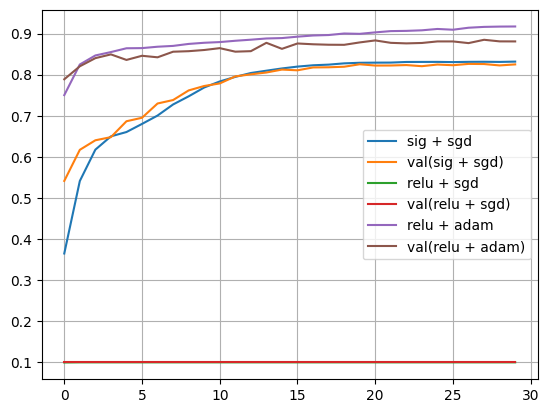

In [40]:
# 시각화
# acc 선그래프로 표현
plt.plot(h1.history['accuracy'], label = 'sig + sgd')
plt.plot(h1.history['val_accuracy'], label = 'val(sig + sgd)')

plt.plot(h2.history['accuracy'], label = 'relu + sgd')
plt.plot(h2.history['val_accuracy'], label = 'val(relu + sgd)')

plt.plot(h3.history['accuracy'], label = 'relu + adam')
plt.plot(h3.history['val_accuracy'], label = 'val(relu + adam)')

plt.legend()
plt.grid()

plt.show()

# 최적화 모델 찾기
- 모델 체크 포인트
  - 최적의 상태인 모델 저장
- 얼리스탑핑
  - 조기 학습 중단 (과대 적합 방지, 시간 낭비 방지)

In [42]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

In [45]:
# 1. 모델 저장
# 저장할 폴더
model_dir = './model/'

# 없으면 해당 폴더 생성
if not os.path.exists(model_dir):
  os.mkdir(model_dir)

# 저장할 파일 이름 + 경로
filePath = model_dir + 'fashion_{epoch:03d}_{val_accuracy:.2f}.hdf5'

# 모델 체크포인트 내용 정의
f_mckp = ModelCheckpoint(filepath = filePath, monitor = 'val_accuracy', save_best_only = True, verbose = 1)

In [46]:
# 조기 학습 중단 정의
f_early = EarlyStopping(monitor = 'val_accuracy', patience = 5) # patience: 모니터의 값 개선을 몇번 기다릴 것인지 설정

In [47]:
# 모델 4 relu, adam
# 학습
model4 = create_model(acti = 'relu', opti = 'adam')
h4 = model4.fit(X_train, y_train_oh, validation_split = 0.3, epochs = 50, batch_size = 64, callbacks = [f_mckp, f_early])

Epoch 1/50
652/657 [============================>.] - ETA: 0s - loss: 2.1971 - accuracy: 0.7436
Epoch 1: val_accuracy improved from -inf to 0.79389, saving model to ./model/fashion_001_0.79.hdf5
657/657 [==============================] - 5s 5ms/step - loss: 2.1864 - accuracy: 0.7443 - val_loss: 0.6879 - val_accuracy: 0.7939
Epoch 2/50
 31/657 [>.............................] - ETA: 2s - loss: 0.6221 - accuracy: 0.7939

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


649/657 [============================>.] - ETA: 0s - loss: 0.5380 - accuracy: 0.8239
Epoch 2: val_accuracy improved from 0.79389 to 0.82517, saving model to ./model/fashion_002_0.83.hdf5
657/657 [==============================] - 3s 4ms/step - loss: 0.5374 - accuracy: 0.8238 - val_loss: 0.5259 - val_accuracy: 0.8252
Epoch 3/50
647/657 [============================>.] - ETA: 0s - loss: 0.4495 - accuracy: 0.8453
Epoch 3: val_accuracy improved from 0.82517 to 0.83889, saving model to ./model/fashion_003_0.84.hdf5
657/657 [==============================] - 4s 6ms/step - loss: 0.4488 - accuracy: 0.8455 - val_loss: 0.4724 - val_accuracy: 0.8389
Epoch 4/50
645/657 [============================>.] - ETA: 0s - loss: 0.4093 - accuracy: 0.8563
Epoch 4: val_accuracy improved from 0.83889 to 0.85872, saving model to ./model/fashion_004_0.86.hdf5
657/657 [==============================] - 4s 5ms/step - loss: 0.4076 - accuracy: 0.8568 - val_loss: 0.4153 - val_accuracy: 0.8587
Epoch 5/50
648/657 [====

In [50]:
# 저장된 모델 로딩하기
# /fashion_025_0.89.hdf5
from tensorflow.keras.models import load_model

In [52]:
best_model = load_model('./model/fashion_025_0.89.hdf5')
best_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
Total params: 242762 (948.29 KB)
Trainable params: 242762 (948.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
X_test[0:1] # 3처원 느낌으로 표현

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0

In [55]:
X_test[[0]] # 이렇게도 가능

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0

In [53]:
pred = best_model.predict(X_test[0:1])
pred

1/1 [==============================] - 0s 247ms/step


array([[8.3417111e-13, 7.0453601e-16, 6.2185916e-11, 2.8189381e-18,
        4.6118296e-13, 7.1045455e-05, 7.6021978e-10, 2.6298456e-03,
        1.0852948e-12, 9.9729913e-01]], dtype=float32)

In [56]:
pd.DataFrame(pred)

,0,1,2,3,4,5,6,7,8,9
0,8.341711e-13,7.045360e-16,6.218592e-11,2.818938e-18,4.611830e-13,0.000071,7.602198e-10,0.00263,1.085295e-12,0.997299


In [57]:
# numpy value 제일 크면 해당 인덱스 출력 함수
np.argmax(pred) # 9(인덱스)번째에 있었던 데이터의 값이 제일 컸다
# 클래스 예측 시 9라는 클래스의 확률 제일 높음
# => 9라고 예측

9

In [58]:
y_test[0]
# => 실제 답도 9

9

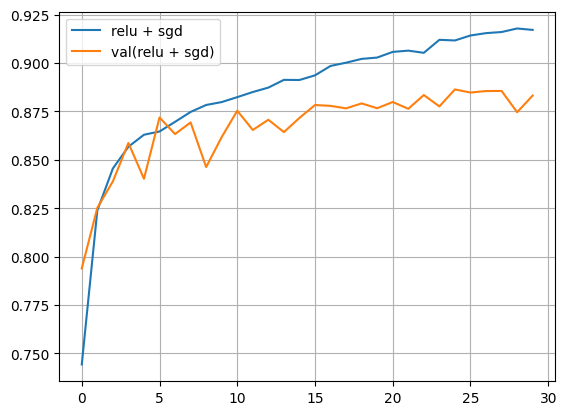

In [48]:
# 시각화
plt.plot(h4.history['accuracy'], label = 'relu + sgd')
plt.plot(h4.history['val_accuracy'], label = 'val(relu + sgd)')

plt.legend()
plt.grid()

plt.show()